## Capstone Project - The Battle of the Neighborhoods
Applied Data Science Capstone by IBM/Coursera

Table of contents
Introduction: Business Problem
Data
Methodology
Analysis
Results and Discussion
Conclusion

#### Introduction: Business Problem 

This project aims to select the safest place in Denver based on the number of crimes, explore the neighborhoods of the location to find the 10 most common venues in each neighborhood and finally cluster the neighborhoods using k-mean clustering.
This report will be targeted to people who are looking to relocate to Denver. 
When people relocate from one location to another location, their top concern is safety in their apartment and neighborhood. If you don’t feel safe in your location, you will not be able to enjoy living there. The crime statistics will provide an insight into this issue.
We will focus on the safest neighborhood and the 10 most common venues in each neighborhood so that the best neighborhood suited to an individual's needs can be selected.

#### Data 
Based on definition of our problem, factors that will influence our decision are:
 The total number of crimes commited in each of the borough during the last year.
 The most common venues in each of the neighborhood in the safest borough selected.
 Following data sources will be needed to extract/generate the required information:
 
Part 1: Preprocessing a real world data set from Kaggle showing the Denver Crimes from 2002 to 2019: A dataset consisting of     the crime statistics of each Neighborhood in Denver obtained from Kaggle.  
Part 2: Process the bottom five Neighborhoods in Denver interms of number of crimes for both Latitude and Longitude.  
Part 3: Creating a new dataset of the Neighborhoods of the safest Neighborhood in Denver and generating their co-ordinates.:  Co-      ordinate of neighborhood will be obtained using Google Maps API geocoding

#### Part 1: Preprocessing a real world data set from Kaggle showing the Denver Crimes from 2002 to 2019
 Denver Crime Data
 About this file
 lsoa_code: code for Lower Super Output Area in Chicago.
 Neighbourhood: Common name for Neighborhood.
 major_category: High level categorization of crime
 minor_category: Low level categorization of crime within major category.
 value: monthly reported count of categorical crime in given borough
 year: Year of reported counts, 2002-2019
 month: Month of reported counts, 1-12
 Data set URL: https://www.kaggle.com/paultimothymooney/denver-crime-data

Import necessary libraries

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from bs4 import BeautifulSoup # library for web scrapping  

#!conda install -c conda-forge geocoder --yes
import geocoder

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [2]:
CLIENT_ID = 'ATAV0G2H3BIVK0UV14ZEAG5ZEUZVSBE1Q3ZPVDO03ZZN1JPG' # your Foursquare ID
CLIENT_SECRET = 'RORBQMHDEB5XLLIC2WEEXUE3SSYZT5ZIBT5N0KBFY4MEO50F' # your Foursquare Secret

VERSION = '20180604'
LIMIT = 30

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ATAV0G2H3BIVK0UV14ZEAG5ZEUZVSBE1Q3ZPVDO03ZZN1JPG
CLIENT_SECRET:RORBQMHDEB5XLLIC2WEEXUE3SSYZT5ZIBT5N0KBFY4MEO50F


#### Read Dataset

In [3]:
# Read in the data 
df = pd.read_csv("Denver-crime.csv")
df.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,6/15/2016 11:31:00 PM,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0
1,20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,10/11/2017 4:55:00 PM,1/29/2018 5:53:00 PM,NaN,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/25/2016 8:00:00 AM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,1,0
3,201872333,201872333239900,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,NaN,1/30/2018 10:29:00 PM,705 S COLORADO BLVD,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,1,0
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,NaN,6/23/2017 4:09:00 PM,2810 E 1ST AVE,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,1,0


In [5]:
df.loc[df['NEIGHBORHOOD_ID'] == 'wellshire']

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/25/2016 8:00:00 AM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,1,0
476,201871660,201871660350400,3504,0,drug-hallucinogen-possess,drug-alcohol,1/30/2018 2:00:00 PM,NaN,1/30/2018 4:07:00 PM,2600 BLOCK E YALE AVE,3153287.0,1668479.0,-104.955485,39.667511,3,314,wellshire,1,0
836,2018129270,2018129270110900,1109,0,sex-aslt-non-rape,sexual-assault,2/23/2018 4:52:00 PM,NaN,2/23/2018 7:46:00 PM,NaN,NaN,NaN,NaN,NaN,3,314,wellshire,1,0
1971,2018120624,2018120624544100,5441,0,traffic-accident,traffic-accident,2/20/2018 6:25:00 AM,NaN,2/20/2018 8:53:00 AM,S COLORADO BLVD / E AMHERST AVE,3157456.0,1667771.0,-104.940692,39.665498,3,314,wellshire,0,1
5943,20186001172,20186001172230400,2304,0,theft-parts-from-vehicle,theft-from-motor-vehicle,2/4/2018 1:35:00 PM,2/4/2018 1:35:00 PM,2/4/2018 1:47:00 PM,3456 E CORNELL AVE,3155762.0,1666701.0,-104.946732,39.662589,3,314,wellshire,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463346,2019746931,2019746931220401,2204,1,burg-auto-theft-resd-no-force,burglary,11/24/2019 12:00:00 AM,11/24/2019 9:30:00 AM,11/24/2019 12:28:00 PM,3227 S STEELE ST,3154895.0,1665294.0,-104.949842,39.658741,3,314,wellshire,1,0
463941,2019755531,2019755531269904,2699,4,drug-fraud-to-obtain,drug-alcohol,11/20/2019 9:00:00 AM,11/29/2019 2:15:00 PM,11/29/2019 2:15:00 PM,2800 S UNIVERSITY BLVD,3152869.0,1667857.0,-104.956983,39.665810,3,314,wellshire,1,0
464643,2019782939,2019782939299901,2999,1,criminal-mischief-mtr-veh,public-disorder,12/11/2019 2:00:00 PM,12/12/2019 6:00:00 AM,12/12/2019 8:59:00 AM,3801 E HAMPDEN AVE,3156844.0,1663271.0,-104.942964,39.653154,3,314,wellshire,1,0
465497,2019810941,2019810941240400,2404,0,theft-of-motor-vehicle,auto-theft,12/26/2019 12:45:00 AM,12/26/2019 9:00:00 AM,12/26/2019 12:45:00 PM,3202 S ADAMS WAY,3155588.0,1665484.0,-104.947376,39.659251,3,314,wellshire,1,0


In [6]:
df1 = df[['OFFENSE_ID', 'OFFENSE_CODE', 'OFFENSE_TYPE_ID', 'OFFENSE_CATEGORY_ID',  'NEIGHBORHOOD_ID', 'IS_CRIME', 'IS_TRAFFIC', 'GEO_LAT', 'GEO_LON', 'REPORTED_DATE']]
df1.head()

,OFFENSE_ID,OFFENSE_CODE,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,GEO_LAT,GEO_LON,REPORTED_DATE
0,2016376978521300,5213,weapon-unlawful-discharge-of,all-other-crimes,montbello,1,0,39.773188,-104.809881,6/15/2016 11:31:00 PM
1,20186000994239900,2399,theft-other,larceny,gateway-green-valley-ranch,1,0,39.785649,-104.781434,1/29/2018 5:53:00 PM
2,20166003953230500,2305,theft-items-from-vehicle,theft-from-motor-vehicle,wellshire,1,0,39.663490,-104.957381,4/26/2016 9:02:00 PM
3,201872333239900,2399,theft-other,larceny,belcaro,1,0,39.702698,-104.941440,1/30/2018 10:29:00 PM
4,2017411405230300,2303,theft-shoplift,larceny,cherry-creek,1,0,39.717107,-104.955370,6/23/2017 4:09:00 PM


#### Convert Date Time

In [7]:
df1['REPORTED_DATE'] = pd.to_datetime(df1['REPORTED_DATE'])
df1.head()

C:\anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,OFFENSE_ID,OFFENSE_CODE,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,GEO_LAT,GEO_LON,REPORTED_DATE
0,2016376978521300,5213,weapon-unlawful-discharge-of,all-other-crimes,montbello,1,0,39.773188,-104.809881,2016-06-15 23:31:00
1,20186000994239900,2399,theft-other,larceny,gateway-green-valley-ranch,1,0,39.785649,-104.781434,2018-01-29 17:53:00
2,20166003953230500,2305,theft-items-from-vehicle,theft-from-motor-vehicle,wellshire,1,0,39.663490,-104.957381,2016-04-26 21:02:00
3,201872333239900,2399,theft-other,larceny,belcaro,1,0,39.702698,-104.941440,2018-01-30 22:29:00
4,2017411405230300,2303,theft-shoplift,larceny,cherry-creek,1,0,39.717107,-104.955370,2017-06-23 16:09:00


#### Accessing the most recent crime rates (2019)

In [8]:
df1['year'] = pd.DatetimeIndex(df1['REPORTED_DATE']).year
df2 = df1.drop(df1.index[df1['year'] != 2019])
df2.shape

C:\anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(89843, 11)

In [9]:
#Removing the entries where IS_CRIME is null
df2 = df2[df2.IS_CRIME != 0]
df3 = df2[['OFFENSE_CODE', 'OFFENSE_TYPE_ID', 'OFFENSE_CATEGORY_ID',  'NEIGHBORHOOD_ID', 'IS_CRIME', 'year']]
df3
df3.shape

(66238, 6)

In [10]:
df3.head()

,OFFENSE_CODE,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,NEIGHBORHOOD_ID,IS_CRIME,year
1568,1208,robbery-residence,robbery,east-colfax,1,2019
23326,5499,traf-other,all-other-crimes,jefferson-park,1,2019
23327,2404,theft-of-motor-vehicle,auto-theft,west-highland,1,2019
23328,2303,theft-shoplift,larceny,city-park,1,2019
23329,2999,criminal-mischief-mtr-veh,public-disorder,montbello,1,2019


In [11]:
df3.reset_index(inplace = True, drop = True)

df3.head()

,OFFENSE_CODE,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,NEIGHBORHOOD_ID,IS_CRIME,year
0,1208,robbery-residence,robbery,east-colfax,1,2019
1,5499,traf-other,all-other-crimes,jefferson-park,1,2019
2,2404,theft-of-motor-vehicle,auto-theft,west-highland,1,2019
3,2303,theft-shoplift,larceny,city-park,1,2019
4,2999,criminal-mischief-mtr-veh,public-disorder,montbello,1,2019


#### Total number of crimes in each Neighborhood

In [12]:
#Crimes count neighborhood wise
df3['NEIGHBORHOOD_ID'].value_counts()

five-points     4324
stapleton       3052
cbd             2883
capitol-hill    2500
montbello       2407
                ... 
rosedale         206
skyland          194
country-club     141
indian-creek      84
wellshire         68
Name: NEIGHBORHOOD_ID, Length: 78, dtype: int64

In [14]:
#### The total crimes per Offense category

In [15]:
#Category wise crimes count
df3['OFFENSE_CATEGORY_ID'].value_counts()

all-other-crimes                14642
larceny                          9804
public-disorder                  8450
theft-from-motor-vehicle         8129
auto-theft                       5375
drug-alcohol                     5037
other-crimes-against-persons     4657
burglary                         4024
aggravated-assault               2519
white-collar-crime               1384
robbery                          1193
sexual-assault                    856
arson                              98
murder                             70
Name: OFFENSE_CATEGORY_ID, dtype: int64

#### Pivoting the table to view the no. of crimes for each major category in each Borough

In [16]:
Denver_crime = pd.pivot_table(df3,values=['IS_CRIME'],
                               index=['NEIGHBORHOOD_ID'],
                               columns=['OFFENSE_CATEGORY_ID'],
                               aggfunc=np.sum,fill_value=0)
Denver_crime.head()

IS_CRIME                                    \
OFFENSE_CATEGORY_ID aggravated-assault all-other-crimes arson auto-theft   
NEIGHBORHOOD_ID                                                            
athmar-park                         33              207     1         63   
auraria                             15              271     1         19   
baker                               28              227     6         72   
barnum                              35              212     2         40   
barnum-west                         13              100     3         41   

                                                          \
OFFENSE_CATEGORY_ID burglary drug-alcohol larceny murder   
NEIGHBORHOOD_ID                                            
athmar-park               28           98      58      1   
auraria                   24           28      97      0   
baker                     49          120     262      0   
barnum                    27           47      31      1   
barnum-west               14           42      11      1   

                                                                          \
OFFENSE_CATEGORY_ID other-crimes-against-persons public-disorder robbery   
NEIGHBORHOOD_ID                                                            
athmar-park                                   48              81      16   
auraria                                       52             100      11   
baker                                         55             133      21   
barnum                                        46              91      17   
barnum-west                                   16              60       2   

                                                                                
OFFENSE_CATEGORY_ID sexual-assault theft-from-motor-vehicle white-collar-crime  
NEIGHBORHOOD_ID                                                                 
athmar-park                      9                       86                 21  
auraria                          8                       35                 11  
baker                            7                      123                 20  
barnum                          10                       51                 11  
barnum-west                      4                       38                  4

In [17]:
Denver_crime.reset_index(inplace = True)

In [18]:
Denver_crime['Total'] = Denver_crime.sum(axis=1)
Denver_crime.head(33)

NEIGHBORHOOD_ID           IS_CRIME  \
OFFENSE_CATEGORY_ID                             aggravated-assault   
0                                   athmar-park                 33   
1                                       auraria                 15   
2                                         baker                 28   
3                                        barnum                 35   
4                                   barnum-west                 13   
5                                   bear-valley                 21   
6                                       belcaro                  3   
7                                      berkeley                 12   
8                                  capitol-hill                110   
9                                           cbd                 94   
10                                 chaffee-park                 13   
11                                cheesman-park                 25   
12                                 cherry-creek                  5   
13                                    city-park                 12   
14                               city-park-west                 42   
15                                 civic-center                 72   
16                                      clayton                 19   
17                                         cole                 25   
18                    college-view-south-platte                 53   
19                                congress-park                 21   
20                                 cory-merrill                  3   
21                                 country-club                  3   
22                                          dia                 19   
23                                  east-colfax                 65   
24                               elyria-swansea                 25   
25                                  five-points                243   
26                                   fort-logan                 18   
27                   gateway-green-valley-ranch                 89   
28                                   globeville                 38   
29                                    goldsmith                 19   
30                                         hale                 13   
31                                      hampden                 39   
32                                hampden-south                 25   

                                                                             \
OFFENSE_CATEGORY_ID all-other-crimes arson auto-theft burglary drug-alcohol   
0                                207     1         63       28           98   
1                                271     1         19       24           28   
2                                227     6         72       49          120   
3                                212     2         40       27           47   
4                                100     3         41       14           42   
5                                 65     0         53       36           21   
6                                 46     0         20       41           10   
7                                 74     0         54       56           27   
8                                466     4        132      131          420   
9                                772     5         72       51          220   
10                                84     2         30       14           34   
11                               229     2         51       60          262   
12                                49     0         47       67           15   
13                                43     1         17       33           13   
14                               170     2         41       63           77   
15                              1013     2         30       38          202   
16                               120     1         36       35           38   
17                               123     0         35       27           29   
1

In [19]:
Denver_crime.columns = Denver_crime.columns.map(''.join)
Denver_crime.head()

,NEIGHBORHOOD_ID,IS_CRIMEaggravated-assault,IS_CRIMEall-other-crimes,IS_CRIMEarson,IS_CRIMEauto-theft,IS_CRIMEburglary,IS_CRIMEdrug-alcohol,IS_CRIMElarceny,IS_CRIMEmurder,IS_CRIMEother-crimes-against-persons,IS_CRIMEpublic-disorder,IS_CRIMErobbery,IS_CRIMEsexual-assault,IS_CRIMEtheft-from-motor-vehicle,IS_CRIMEwhite-collar-crime,Total
0,athmar-park,33,207,1,63,28,98,58,1,48,81,16,9,86,21,750
1,auraria,15,271,1,19,24,28,97,0,52,100,11,8,35,11,672
2,baker,28,227,6,72,49,120,262,0,55,133,21,7,123,20,1123
3,barnum,35,212,2,40,27,47,31,1,46,91,17,10,51,11,621
4,barnum-west,13,100,3,41,14,42,11,1,16,60,2,4,38,4,349


In [20]:
Denver_crime.columns = ['Neighborhood','aggravated-assault', 'all-other-crimes','Earson','auto-theft',
                        'burglary','drug-alcohol','larceny','murder','other-crimes-against-persons','public-disorder','robbery','sexual-assault','theft-from-motor-vehicle','white-collar-crime','Total']
Denver_crime.head()

,Neighborhood,aggravated-assault,all-other-crimes,Earson,auto-theft,burglary,drug-alcohol,larceny,murder,other-crimes-against-persons,public-disorder,robbery,sexual-assault,theft-from-motor-vehicle,white-collar-crime,Total
0,athmar-park,33,207,1,63,28,98,58,1,48,81,16,9,86,21,750
1,auraria,15,271,1,19,24,28,97,0,52,100,11,8,35,11,672
2,baker,28,227,6,72,49,120,262,0,55,133,21,7,123,20,1123
3,barnum,35,212,2,40,27,47,31,1,46,91,17,10,51,11,621
4,barnum-west,13,100,3,41,14,42,11,1,16,60,2,4,38,4,349


In [21]:
Denver_crime.shape

(78, 16)

In [22]:
Denver_crime.shape

(78, 16)

In [23]:
Denver_crime.describe()

,aggravated-assault,all-other-crimes,Earson,auto-theft,burglary,drug-alcohol,larceny,murder,other-crimes-against-persons,public-disorder,robbery,sexual-assault,theft-from-motor-vehicle,white-collar-crime,Total
count,78.000000,78.000000,78.00000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,32.294872,187.717949,1.25641,68.910256,51.589744,64.576923,125.692308,0.897436,59.705128,108.333333,15.294872,10.974359,104.217949,17.743590,849.205128
std,36.949284,205.284212,1.59085,52.556756,33.051096,83.519267,165.732715,1.123419,69.044332,96.657068,15.843479,10.813621,71.304113,18.499165,741.054397
min,1.000000,4.000000,0.00000,6.000000,4.000000,1.000000,5.000000,0.000000,2.000000,11.000000,0.000000,0.000000,18.000000,1.000000,68.000000
25%,12.250000,59.000000,0.00000,38.250000,32.250000,16.250000,49.250000,0.000000,22.000000,52.000000,6.000000,5.000000,65.000000,8.000000,414.250000
50%,21.000000,102.500000,1.00000,54.500000,44.000000,37.000000,70.500000,1.000000,40.000000,79.500000,10.500000,7.000000,87.500000,12.000000,552.500000
75%,37.250000,228.500000,2.00000,82.000000,60.750000,79.250000,131.500000,1.000000,57.500000,120.000000,19.750000,12.500000,124.500000,19.000000,954.000000
max,243.000000,1013.000000,7.00000,259.000000,202.000000,475.000000,959.000000,5.000000,419.000000,626.000000,87.000000,65.000000,483.000000,132.000000,4324.000000


In [24]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

Matplotlib version:  3.1.3


In [25]:
Denver_crime.shape

(78, 16)

In [26]:
Denver_crime.sort_values(['Total'], ascending = False, axis = 0, inplace = True )
df_top5 = Denver_crime.head() 
df_tt = df_top5[['Neighborhood','Total']]
df_top5

,Neighborhood,aggravated-assault,all-other-crimes,Earson,auto-theft,burglary,drug-alcohol,larceny,murder,other-crimes-against-persons,public-disorder,robbery,sexual-assault,theft-from-motor-vehicle,white-collar-crime,Total
25,five-points,243,879,5,201,202,475,591,3,419,626,87,65,483,45,4324
59,stapleton,56,581,0,235,172,189,959,1,156,247,53,24,315,64,3052
9,cbd,94,772,5,72,51,220,762,0,235,387,65,25,139,56,2883
8,capitol-hill,110,466,4,132,131,420,350,1,196,306,46,44,267,27,2500
44,montbello,148,808,7,219,82,126,160,3,181,329,54,38,200,52,2407


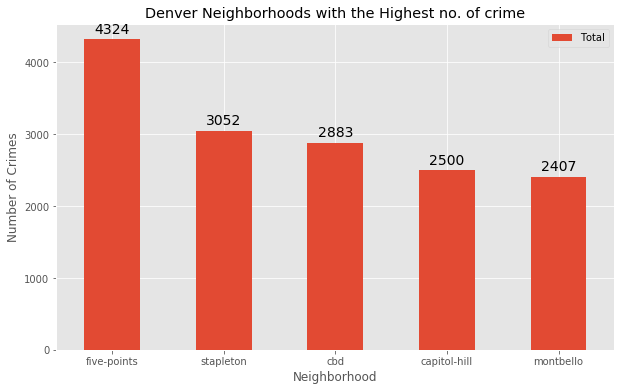

In [27]:
df_tt.set_index('Neighborhood',inplace = True)

ax = df_tt.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Neighborhood') # add y-label to the plot
ax.set_title('Denver Neighborhoods with the Highest no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

In [29]:
Denver_crime.sort_values(['Total'], ascending = True, axis = 0, inplace = True )
df_bot5 = Denver_crime.head() 
df_bot5

,Neighborhood,aggravated-assault,all-other-crimes,Earson,auto-theft,burglary,drug-alcohol,larceny,murder,other-crimes-against-persons,public-disorder,robbery,sexual-assault,theft-from-motor-vehicle,white-collar-crime,Total
72,wellshire,1,4,0,6,12,3,5,0,4,13,0,0,18,2,68
37,indian-creek,1,6,0,9,4,1,11,1,5,13,3,0,26,4,84
21,country-club,3,22,0,12,34,2,17,0,3,11,3,0,33,1,141
54,skyland,6,69,1,13,11,8,16,2,11,22,1,3,26,5,194
52,rosedale,4,30,0,17,19,21,26,0,7,23,1,4,49,5,206


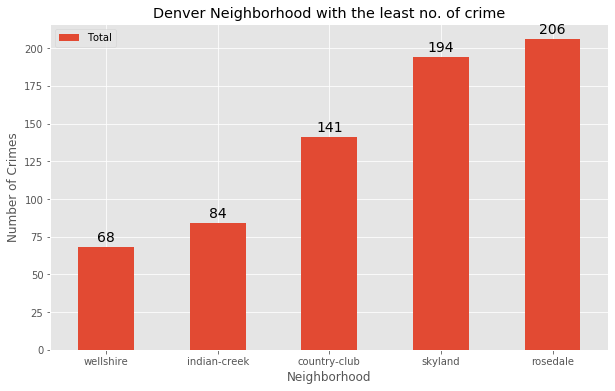

In [30]:
df_bt = df_bot5[['Neighborhood','Total']]

df_bt.set_index('Neighborhood',inplace = True)

ax = df_bt.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') # add to x-label to the plot
ax.set_xlabel('Neighborhood') # add y-label to the plot
ax.set_title('Denver Neighborhood with the least no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

In [32]:
df_col = df_bot5[df_bot5['Neighborhood'] == 'wellshire']
df_col = df_col[['Neighborhood','Total']] #'Area (sq mi)','Population (2013 est)[1]']]
df_col

,Neighborhood,Total
72,wellshire,68


#### Part 2: Get the Latitude and Logitude number using  geolocator

In [97]:
def geoinfo(address):
    j = 'Denver'
    k = 'colorado'
    address = address + ', ' + j + ', ' + k
    geolocator = Nominatim(user_agent="denver_explorer")
    location = geolocator.geocode(address)
    latitude1 = location.latitude
    longitude1 = location.longitude
    return latitude1, longitude1


In [44]:
df_bot5['latitude'] = df_bot5.apply(lambda row: (geoinfo(row['Neighborhood'])[0]), axis=1)
df_bot5['longitude'] = df_bot5.apply(lambda row: (geoinfo(row['Neighborhood'])[1]), axis=1)
df_bot5.head()



C:\anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Neighborhood,aggravated-assault,all-other-crimes,Earson,auto-theft,burglary,drug-alcohol,larceny,murder,other-crimes-against-persons,public-disorder,robbery,sexual-assault,theft-from-motor-vehicle,white-collar-crime,Total,latitude,longitude
72,wellshire,1,4,0,6,12,3,5,0,4,13,0,0,18,2,68,39.658484,-104.941353
37,indian-creek,1,6,0,9,4,1,11,1,5,13,3,0,26,4,84,41.423419,-87.296725
21,country-club,3,22,0,12,34,2,17,0,3,11,3,0,33,1,141,40.618963,-105.041214
54,skyland,6,69,1,13,11,8,16,2,11,22,1,3,26,5,194,39.755713,-104.950224
52,rosedale,4,30,0,17,19,21,26,0,7,23,1,4,49,5,206,39.739236,-104.984862


In [61]:
lat = 39.684761
long = -104.897499
df_bot5.loc[df_bot5.Neighborhood=='indian-creek', 'latitude'] = lat
df_bot5.loc[df_bot5.Neighborhood=='indian-creek', 'longitude'] = long
df_bot5.head()
lat1 = 39.7201
long1 = -104.9667
df_bot5.loc[df_bot5.Neighborhood=='country-club', 'latitude'] = lat1
df_bot5.loc[df_bot5.Neighborhood=='country-club', 'longitude'] = long1
df_bot5.head()

C:\anaconda\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Neighborhood,aggravated-assault,all-other-crimes,Earson,auto-theft,burglary,drug-alcohol,larceny,murder,other-crimes-against-persons,public-disorder,robbery,sexual-assault,theft-from-motor-vehicle,white-collar-crime,Total,latitude,longitude
72,wellshire,1,4,0,6,12,3,5,0,4,13,0,0,18,2,68,39.658484,-104.941353
37,indian-creek,1,6,0,9,4,1,11,1,5,13,3,0,26,4,84,39.684761,-104.897499
21,country-club,3,22,0,12,34,2,17,0,3,11,3,0,33,1,141,39.720100,-104.966700
54,skyland,6,69,1,13,11,8,16,2,11,22,1,3,26,5,194,39.755713,-104.950224
52,rosedale,4,30,0,17,19,21,26,0,7,23,1,4,49,5,206,39.739236,-104.984862


In [62]:
#Get the co-ordinates of wellshire, Denver, United States (The center neighborhood of Kingston upon Thames)
address = 'Denver, United States'

geolocator = Nominatim(user_agent="ld_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Denver are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of Denver are 39.7392364, -104.9848623.


In [66]:
# create map of New York using latitude and longitude values
map_lon = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(df_bot5['latitude'], df_bot5['longitude'], df_bot5['Neighborhood']):
#for lat, lng, neighborhood in zip(df['GEO_LON'], df['GEO_LON'], df['NEIGHBORHOOD_ID']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lon)  
    
map_lon

### Modelling 
1. Finding all the venues within a 500 meter radius of each neighborhood.
2. Perform one hot ecoding on the venues data.
3. Grouping the venues by the neighborhood and calculating their mean.
4. Performing a K-means clustering (Defining K = 5)
5. Create a function to extract the venues from each Neighborhood

In [51]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
            
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [52]:
print(df_bot5['Neighborhood'])

72       wellshire
37    indian-creek
21    country-club
54         skyland
52        rosedale
Name: Neighborhood, dtype: object


In [67]:
CLIENT_SECRET = 'RORBQMHDEB5XLLIC2WEEXUE3SSYZT5ZIBT5N0KBFY4MEO50F' # your Foursquare Secret
df_bot5_venues = getNearbyVenues(names=df_bot5['Neighborhood'],
                                   latitudes=df_bot5['latitude'],
                                   longitudes=df_bot5['longitude']
                                  )

wellshire
indian-creek
country-club
skyland
rosedale


In [68]:
print(df_bot5_venues.shape)
df_bot5_venues.head()

(41, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,wellshire,39.658484,-104.941353,Wellshire Golf Course,39.658276,-104.941329,Golf Course
1,wellshire,39.658484,-104.941353,Mamie D. Eisenhower Park,39.658946,-104.937348,Park
2,wellshire,39.658484,-104.941353,Wellshire Inn,39.658247,-104.941277,Golf Course
3,wellshire,39.658484,-104.941353,Eisenhower Rec Center,39.659563,-104.937773,Athletics & Sports
4,wellshire,39.658484,-104.941353,Eisenhower Park,39.659608,-104.936572,Playground


In [69]:
df_bot5_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
country-club,2,2,2,2,2,2
rosedale,30,30,30,30,30,30
skyland,4,4,4,4,4,4
wellshire,5,5,5,5,5,5


In [70]:
print('There are {} uniques categories.'.format(len(df_bot5_venues['Venue Category'].unique())))

There are 35 uniques categories.


#### One hot encoding
URL: https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f

In [71]:
# one hot encoding
bot5_onehot = pd.get_dummies(df_bot5_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bot5_onehot['Neighborhood'] = df_bot5_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [bot5_onehot.columns[-1]] + list(bot5_onehot.columns[:-1])
bot5_onehot = bot5_onehot[fixed_columns]

bot5_onehot.head()

,Neighborhood,Art Gallery,Art Museum,Athletics & Sports,Bakery,Bookstore,Breakfast Spot,Burger Joint,Café,Carpet Store,...,Organic Grocery,Park,Playground,Poke Place,Pub,Restaurant,Sandwich Place,Shop & Service,Vegetarian / Vegan Restaurant,Yoga Studio
0,wellshire,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,wellshire,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,wellshire,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,wellshire,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,wellshire,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [72]:
bot5_grouped = bot5_onehot.groupby('Neighborhood').mean().reset_index()
bot5_grouped

,Neighborhood,Art Gallery,Art Museum,Athletics & Sports,Bakery,Bookstore,Breakfast Spot,Burger Joint,Café,Carpet Store,...,Organic Grocery,Park,Playground,Poke Place,Pub,Restaurant,Sandwich Place,Shop & Service,Vegetarian / Vegan Restaurant,Yoga Studio
0,country-club,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
1,rosedale,0.033333,0.033333,0.0,0.033333,0.033333,0.033333,0.033333,0.033333,0.00,...,0.033333,0.033333,0.0,0.033333,0.033333,0.033333,0.033333,0.00,0.033333,0.066667
2,skyland,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000
3,wellshire,0.000000,0.000000,0.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.200000,0.2,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000


In [73]:
bot5_grouped.shape

(4, 36)

In [74]:
num_top_venues = 4

for hood in bot5_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = bot5_grouped[bot5_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----country-club----
                     venue  freq
0  Health & Beauty Service   0.5
1              Golf Course   0.5
2              Art Gallery   0.0
3       Mexican Restaurant   0.0


----rosedale----
                           venue  freq
0                    Yoga Studio  0.07
1                   Noodle House  0.07
2            Japanese Restaurant  0.03
3  Vegetarian / Vegan Restaurant  0.03


----skyland----
            venue  freq
0  Shop & Service  0.25
1  Nightlife Spot  0.25
2    Carpet Store  0.25
3      Food Truck  0.25


----wellshire----
                venue  freq
0         Golf Course   0.4
1          Playground   0.2
2                Park   0.2
3  Athletics & Sports   0.2




##### Part 3
###### Create a data frame of the venues
Function to sort the venues in descending order.

In [75]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [77]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bot5_grouped['Neighborhood']

for ind in np.arange(bot5_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bot5_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,country-club,Health & Beauty Service,Golf Course,Yoga Studio,Carpet Store,Gym,Food Truck,Exhibit,Dance Studio,Café,Japanese Restaurant
1,rosedale,Yoga Studio,Noodle House,Marijuana Dispensary,Art Museum,Bakery,Bookstore,Breakfast Spot,Burger Joint,Café,Dance Studio
2,skyland,Carpet Store,Shop & Service,Food Truck,Nightlife Spot,Yoga Studio,Gym,Golf Course,Exhibit,Dance Studio,Café
3,wellshire,Golf Course,Athletics & Sports,Playground,Park,Yoga Studio,Carpet Store,Gym,Food Truck,Exhibit,Dance Studio


### Step 3: Clustering similar neighborhoods together using k - means clustering

In [79]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 4

bot5_grouped_clustering = bot5_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bot5_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 1, 3, 2])

In [80]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_)

bot5_merged = df_bot5_venues

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
bot5_merged = bot5_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

bot5_merged.head() # check the last columns!

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,wellshire,39.658484,-104.941353,Wellshire Golf Course,39.658276,-104.941329,Golf Course,2,Golf Course,Athletics & Sports,Playground,Park,Yoga Studio,Carpet Store,Gym,Food Truck,Exhibit,Dance Studio
1,wellshire,39.658484,-104.941353,Mamie D. Eisenhower Park,39.658946,-104.937348,Park,2,Golf Course,Athletics & Sports,Playground,Park,Yoga Studio,Carpet Store,Gym,Food Truck,Exhibit,Dance Studio
2,wellshire,39.658484,-104.941353,Wellshire Inn,39.658247,-104.941277,Golf Course,2,Golf Course,Athletics & Sports,Playground,Park,Yoga Studio,Carpet Store,Gym,Food Truck,Exhibit,Dance Studio
3,wellshire,39.658484,-104.941353,Eisenhower Rec Center,39.659563,-104.937773,Athletics & Sports,2,Golf Course,Athletics & Sports,Playground,Park,Yoga Studio,Carpet Store,Gym,Food Truck,Exhibit,Dance Studio
4,wellshire,39.658484,-104.941353,Eisenhower Park,39.659608,-104.936572,Playground,2,Golf Course,Athletics & Sports,Playground,Park,Yoga Studio,Carpet Store,Gym,Food Truck,Exhibit,Dance Studio


In [81]:
bot5_merged.shape

(41, 18)

In [82]:
bot5_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Neighborhood            41 non-null     object 
 1   Neighborhood Latitude   41 non-null     float64
 2   Neighborhood Longitude  41 non-null     float64
 3   Venue                   41 non-null     object 
 4   Venue Latitude          41 non-null     float64
 5   Venue Longitude         41 non-null     float64
 6   Venue Category          41 non-null     object 
 7   Cluster Label           41 non-null     int32  
 8   1st Most Common Venue   41 non-null     object 
 9   2nd Most Common Venue   41 non-null     object 
 10  3rd Most Common Venue   41 non-null     object 
 11  4th Most Common Venue   41 non-null     object 
 12  5th Most Common Venue   41 non-null     object 
 13  6th Most Common Venue   41 non-null     object 
 14  7th Most Common Venue   41 non-null     obje

In [83]:
bot5_merged.dropna(inplace = True)
bot5_merged.shape

(41, 18)

In [85]:
bot5_merged['Cluster Label'] = bot5_merged['Cluster Label'].astype(int)
bot5_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 40
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Neighborhood            41 non-null     object 
 1   Neighborhood Latitude   41 non-null     float64
 2   Neighborhood Longitude  41 non-null     float64
 3   Venue                   41 non-null     object 
 4   Venue Latitude          41 non-null     float64
 5   Venue Longitude         41 non-null     float64
 6   Venue Category          41 non-null     object 
 7   Cluster Label           41 non-null     int32  
 8   1st Most Common Venue   41 non-null     object 
 9   2nd Most Common Venue   41 non-null     object 
 10  3rd Most Common Venue   41 non-null     object 
 11  4th Most Common Venue   41 non-null     object 
 12  5th Most Common Venue   41 non-null     object 
 13  6th Most Common Venue   41 non-null     object 
 14  7th Most Common Venue   41 non-null     obje

#### Visualize the clusters

In [90]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bot5_merged['Neighborhood Latitude'], bot5_merged['Neighborhood Longitude'], bot5_merged['Neighborhood'], bot5_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

#### Analysis
Analyse each of the clusters to identify the characteristics of each cluster and the neighborhoods in them. 

Examine the first cluster

In [92]:
bot5_merged[bot5_merged['Cluster Label'] == 0]

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,country-club,39.7201,-104.9667,Denver Country Club,39.717805,-104.966252,Golf Course,0,Health & Beauty Service,Golf Course,Yoga Studio,Carpet Store,Gym,Food Truck,Exhibit,Dance Studio,Café,Japanese Restaurant
6,country-club,39.7201,-104.9667,Namaste Health Care,39.718477,-104.969934,Health & Beauty Service,0,Health & Beauty Service,Golf Course,Yoga Studio,Carpet Store,Gym,Food Truck,Exhibit,Dance Studio,Café,Japanese Restaurant


The first Neighborhood cluster has two Venues which are Golf Course and Health & Beauty Service

In [93]:
bot5_merged[bot5_merged['Cluster Label'] == 1]

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,rosedale,39.739236,-104.984862,Sassafras American Eatery,39.739949,-104.982756,Breakfast Spot,1,Yoga Studio,Noodle House,Marijuana Dispensary,Art Museum,Bakery,Bookstore,Breakfast Spot,Burger Joint,Café,Dance Studio
12,rosedale,39.739236,-104.984862,Phở-natic,39.740081,-104.984111,Noodle House,1,Yoga Studio,Noodle House,Marijuana Dispensary,Art Museum,Bakery,Bookstore,Breakfast Spot,Burger Joint,Café,Dance Studio
13,rosedale,39.739236,-104.984862,"City, O' City",39.736724,-104.984669,Vegetarian / Vegan Restaurant,1,Yoga Studio,Noodle House,Marijuana Dispensary,Art Museum,Bakery,Bookstore,Breakfast Spot,Burger Joint,Café,Dance Studio
14,rosedale,39.739236,-104.984862,Capitol Hill Books,39.739979,-104.983472,Bookstore,1,Yoga Studio,Noodle House,Marijuana Dispensary,Art Museum,Bakery,Bookstore,Breakfast Spot,Burger Joint,Café,Dance Studio
15,rosedale,39.739236,-104.984862,Shish Kabob Grill,39.740246,-104.983633,Middle Eastern Restaurant,1,Yoga Studio,Noodle House,Marijuana Dispensary,Art Museum,Bakery,Bookstore,Breakfast Spot,Burger Joint,Café,Dance Studio
16,rosedale,39.739236,-104.984862,Kindness Yoga,39.736721,-104.984407,Yoga Studio,1,Yoga Studio,Noodle House,Marijuana Dispensary,Art Museum,Bakery,Bookstore,Breakfast Spot,Burger Joint,Café,Dance Studio
17,rosedale,39.739236,-104.984862,Good Chemistry - Denver Dispensary,39.739907,-104.982668,Marijuana Dispensary,1,Yoga Studio,Noodle House,Marijuana Dispensary,Art Museum,Bakery,Bookstore,Breakfast Spot,Burger Joint,Café,Dance Studio
18,rosedale,39.739236,-104.984862,CorePower Yoga,39.737070,-104.983057,Yoga Studio,1,Yoga Studio,Noodle House,Marijuana Dispensary,Art Museum,Bakery,Bookstore,Breakfast Spot,Burger Joint,Café,Dance Studio
19,rosedale,39.739236,-104.984862,City Grille,39.740165,-104.982861,Burger Joint,1,Yoga Studio,Noodle House,Marijuana Dispensary,Art Museum,Bakery,Bookstore,Breakfast Spot,Burger Joint,Café,Dance Studio
20,rosedale,39.739236,-104.984862,Civic Center Park,39.739370,-104.988776,Park,1,Yoga Studio,Noodle House,Marijuana Dispensary,Art Museum,Bakery,Bookstore,Breakfast Spot,Burger Joint,Café,Dance Studio


The second Neighborhood cluster is the biggest cluster with consists of 40 venues nearby. the venues includes Restaurents, Yoga centers, nightclubs, Parks....etc

In [95]:
bot5_merged[bot5_merged['Cluster Label'] == 2]

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,wellshire,39.658484,-104.941353,Wellshire Golf Course,39.658276,-104.941329,Golf Course,2,Golf Course,Athletics & Sports,Playground,Park,Yoga Studio,Carpet Store,Gym,Food Truck,Exhibit,Dance Studio
1,wellshire,39.658484,-104.941353,Mamie D. Eisenhower Park,39.658946,-104.937348,Park,2,Golf Course,Athletics & Sports,Playground,Park,Yoga Studio,Carpet Store,Gym,Food Truck,Exhibit,Dance Studio
2,wellshire,39.658484,-104.941353,Wellshire Inn,39.658247,-104.941277,Golf Course,2,Golf Course,Athletics & Sports,Playground,Park,Yoga Studio,Carpet Store,Gym,Food Truck,Exhibit,Dance Studio
3,wellshire,39.658484,-104.941353,Eisenhower Rec Center,39.659563,-104.937773,Athletics & Sports,2,Golf Course,Athletics & Sports,Playground,Park,Yoga Studio,Carpet Store,Gym,Food Truck,Exhibit,Dance Studio
4,wellshire,39.658484,-104.941353,Eisenhower Park,39.659608,-104.936572,Playground,2,Golf Course,Athletics & Sports,Playground,Park,Yoga Studio,Carpet Store,Gym,Food Truck,Exhibit,Dance Studio


The third Neighborhood cluster has five venues nearby which include Golf Course, Park, Rec Center & Play Ground.

In [96]:
bot5_merged[bot5_merged['Cluster Label'] == 3]

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,skyland,39.755713,-104.950224,Street Food Warriors,39.754849,-104.947826,Food Truck,3,Carpet Store,Shop & Service,Food Truck,Nightlife Spot,Yoga Studio,Gym,Golf Course,Exhibit,Dance Studio,Café
8,skyland,39.755713,-104.950224,Owl Club of Denver,39.757190,-104.946836,Nightlife Spot,3,Carpet Store,Shop & Service,Food Truck,Nightlife Spot,Yoga Studio,Gym,Golf Course,Exhibit,Dance Studio,Café
9,skyland,39.755713,-104.950224,East 28th Liquor,39.757153,-104.946129,Shop & Service,3,Carpet Store,Shop & Service,Food Truck,Nightlife Spot,Yoga Studio,Gym,Golf Course,Exhibit,Dance Studio,Café
10,skyland,39.755713,-104.950224,Modern and Custom Rugs by Doris Leslie Blau,39.757791,-104.955253,Carpet Store,3,Carpet Store,Shop & Service,Food Truck,Nightlife Spot,Yoga Studio,Gym,Golf Course,Exhibit,Dance Studio,Café


The fourth Neighborhood cluster has four venues nearby which include Street Food, Nightlife spot, shop & a carpetstore .


#### Results and Discussion 
The aim of this project is to help people who want to relocate to the safest neighborhood in Denver, expats can chose the neighborhoods to which they want to relocate based on the most common venues in it. 
For example if a person is looking for a neighborhood with good connectivity and public transportation we can see that Cluster 2 has the most common venues. If a person is looking for a neighborhood with stores and sports centers in a close proximity then the neighborhoods in the third cluster is suitable.


#### Conclusion 
This project helps a person get a better understanding of the neighborhoods with respect to the most common venues in that neighborhood. It is always helpful to make use of technology to stay one step ahead i.e. finding out more about places before moving into a neighborhood. We have just taken safety as a primary concern to shortlist the Neighborhoods of Denver. The future of this project includes taking other factors such as cost of living in the areas into consideration to shortlist the neighborhoods based on safety and a predefined budget.